This script describes how we processed the 10x multiome data of the T2D study, preparing them for training and downstream analysis.

**Note:**

Before running the following scripts, download processed data of the T2D study from the GEO database under accession number GSE200044 (https://ftp.ncbi.nlm.nih.gov/geo/series/GSE200nnn/GSE200044/suppl/GSE200044%5Fprocessed%5Fmatrix.tar.gz), unzip the file, and put them under the assigned directory.

In [1]:
library(Matrix)
library(Signac)
library(Seurat)
library(SeuratDisk)
library(EnsDb.Mmusculus.v79)
library(EnsDb.Hsapiens.v75)
library(dplyr)
library(ggplot2)
#library(BSgenome.Hsapiens.UCSC.hg38)

set.seed(42)
setwd("/nfs/public/xixi/scRegulate/T2D/data/processed_matrix")

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand,

In [15]:
rna_mat <- t(Matrix::readMM('./beta_RNA.mtx'))
barcodes <- read.delim('beta_RNA.barcodes', header = F)
genes <- read.delim('beta_RNA.genes', header = F)
colnames(rna_mat) <- barcodes$V1
rownames(rna_mat) <- genes$V1
rna_mat

  [[ suppressing 32 column names 'A0011_AAACAGCCACTAGGTC-1', 'A0011_AAACCAACAAATTGCT-1', 'A0011_AAACCGAAGCAGGTGG-1' ... ]]

  [[ suppressing 32 column names 'A0011_AAACAGCCACTAGGTC-1', 'A0011_AAACCAACAAATTGCT-1', 'A0011_AAACCGAAGCAGGTGG-1' ... ]]

  [[ suppressing 32 column names 'A0011_AAACAGCCACTAGGTC-1', 'A0011_AAACCAACAAATTGCT-1', 'A0011_AAACCGAAGCAGGTGG-1' ... ]]



58686 x 33011 sparse Matrix of class "dgTMatrix"
                                                                                            
DDX11L1            .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
WASH7P             .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
RP11-34P13.3       .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
FAM138A            .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
OR4G4P             .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
OR4G11P            .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
OR4F5              .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
RP11-34P13.7       1  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
RP11-34P13.8       .  .  . . .  . . .  . . .  .  .  .  . .  .  . . . . . .  .  .  . . .  . .
RP11-34P13.10      . 

In [16]:
# Create Seurat object
beta <- CreateSeuratObject(counts = rna_mat, min.cells = 5, min.features = 10)
beta[["percent.mt"]] <- PercentageFeatureSet(beta, pattern = "^MT-")
beta

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


An object of class Seurat 
32662 features across 33011 samples within 1 assay 
Active assay: RNA (32662 features, 0 variable features)

In [17]:
atac_mat <- t(Matrix::readMM('./beta_ATAC_500bp.mtx'))
barcodes <- read.delim('beta_ATAC_500bp.barcodes', header = F)
peaks <- read.delim('beta_ATAC_500bp.regions', header = F)
colnames(atac_mat) <- barcodes$V1
rownames(atac_mat) <- peaks$V1
atac_mat

  [[ suppressing 31 column names 'A0011_AAACAGCCACTAGGTC-1', 'A0011_AAACCAACAAATTGCT-1', 'A0011_AAACCGAAGCAGGTGG-1' ... ]]

  [[ suppressing 31 column names 'A0011_AAACAGCCACTAGGTC-1', 'A0011_AAACCAACAAATTGCT-1', 'A0011_AAACCGAAGCAGGTGG-1' ... ]]

  [[ suppressing 31 column names 'A0011_AAACAGCCACTAGGTC-1', 'A0011_AAACCAACAAATTGCT-1', 'A0011_AAACCGAAGCAGGTGG-1' ... ]]



412113 x 33011 sparse Matrix of class "dgTMatrix"
                                                                                             
10:100001665-100002165 . . . . . . . . . . . . . . . . . . .  . . . . . . . 2 .  . . . ......
10:100002531-100003031 . . . . . . . . . . . . . . . . . . .  . . . . . . . . .  . . . ......
10:100003836-100004336 . . . . . . . . . . . . . . . . . . .  . . . . . . . . .  . . . ......
10:100005433-100005933 . . . . . . . . . . . . . . . . . . .  . . . . . . . . .  . . . ......
10:100006548-100007048 . . . . . . . . . . . . . . . . . . .  . . . . 2 . . . .  . . . ......
10:100013839-100014339 . . . . . 2 . . . . . 2 . . . . . . .  . . . . . . 2 . .  . . . ......
10:100018334-100018834 . . . . . . . . . 5 . . . . . . . . .  . . . . . . . . .  . . . ......
10:100019564-100020064 . . . . . . . . . 2 . . . . . . . . .  . . . . . 2 . . .  . . . ......
10:100020408-100020908 . . . . . . . . . . . . . . . . . . .  . . . . 2 . . . .  . . . ......
10:1000215

In [33]:
# Now add in the ATAC-seq data
# we'll only use peaks in standard chromosomes
grange.counts <- StringToGRanges(rownames(atac_mat), sep = c(":", "-"))
grange.use <- seqnames(grange.counts) %in% standardChromosomes(grange.counts)
atac_counts <- atac_mat[as.vector(grange.use), ]
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
#seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations) <- "hg19"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [35]:
chrom_assay <- CreateChromatinAssay(
   counts = atac_counts,
   sep = c(":", "-"),
   #genome = 'hg19',
   min.cells = 10,
   annotation = annotations
 )
beta[["ATAC"]] <- chrom_assay

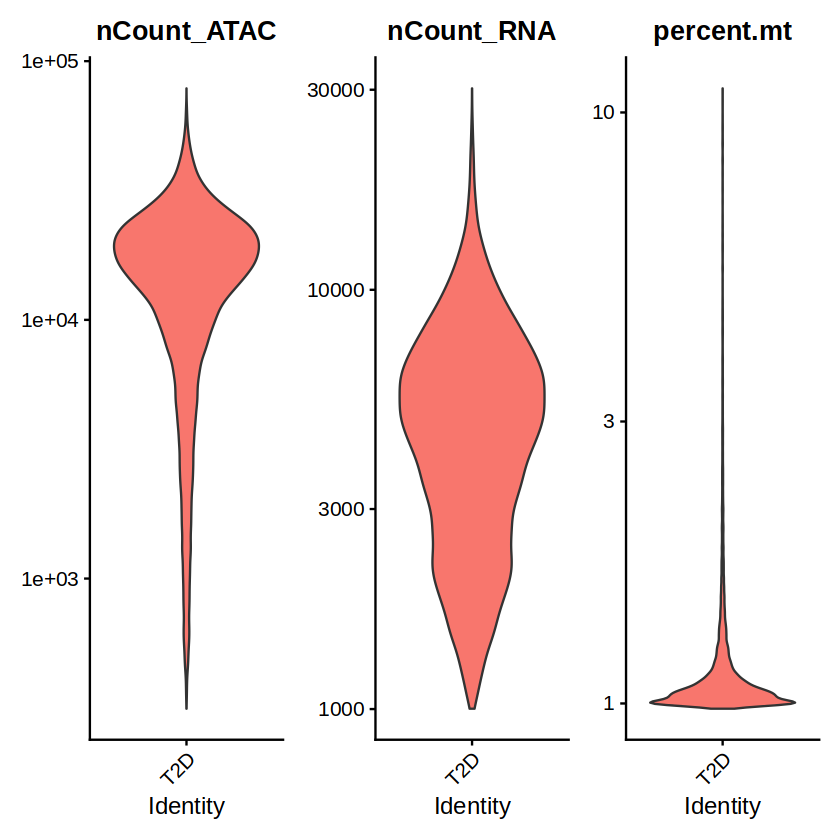

In [41]:
Idents(beta) <- "T2D"
VlnPlot(beta, features = c("nCount_ATAC", "nCount_RNA","percent.mt"), ncol = 3,
  log = TRUE, pt.size = 0) + NoLegend()

In [42]:
beta <- subset(
  x = beta,
  subset = nCount_ATAC < 9e4 &
    nCount_ATAC > 5e3 &
    nCount_RNA < 20000 &
    nCount_RNA > 1000 &
    percent.mt < 2
)
beta

An object of class Seurat 
444759 features across 27864 samples within 2 assays 
Active assay: RNA (32662 features, 0 variable features)
 1 other assay present: ATAC

In [43]:
# RNA analysis
DefaultAssay(beta) <- "RNA"

beta <- FindVariableFeatures(beta, nfeatures = 3000)
beta <- NormalizeData(beta)
beta <- ScaleData(beta)
beta <- RunPCA(beta)

Centering and scaling data matrix

PC_ 1 
Positive:  SLC30A8, TRPM3, DACH1, DLG2, NEGR1, ABCC8, ATP1B1, RP11-355I22.3, SLC8A1, KIRREL3 
	   ERO1B, RFX3, BMP5, MAN1A1, TIPARP, FHIT, LSAMP, DGKB, LRRTM4, EGFEM1P 
	   CNTN5, UNC5C, DPYSL3, CNKSR2, NFIA, NECTIN3, ESRRG, NCALD, NAV2, KCTD8 
Negative:  INS, ABHD3, IARS, SLC35F3, RP11-3L8.3, RP11-213H15.3, EML5, DNAJA4, PLA2G4C, CREB5 
	   BACH2, RP11-37N22.1, UPP2, RP11-665G4.1, RP11-139E24.1, LURAP1L, FAM129A, RP11-540A21.3, SEL1L, GCG 
	   MAP4K5, SQSTM1, BPIFC, AP000688.14, SYNJ2, RP11-959I15.3, RRAS2, CTD-2587M2.1, RP1-78O14.1, HSPA5 
PC_ 2 
Positive:  G6PC2, ABCC8, MT2A, INS, TRPM3, ROBO2, ERO1B, SLC30A8, GLRA1, MT1E 
	   GCG, MT1X, CNTN4, PAPSS2, LINGO2, TTR, RP11-162G9.1, H1FX, DACH2, SST 
	   HS6ST3, PDX1-AS1, CTB-12O2.1, PDZD2, CDKN1C, HIST1H2BD, HSPA1B, PLCXD3, EDARADD, RFX6 
Negative:  DNAH7, RB1CC1, CRY1, CFAP69, SGMS2, MOK, RFX2, AMPD3, NEK10, HYDIN 
	   PAM, KIF1A, PER2, TMEM38B, IRS2, CHEK1, ULK4, IFT88, TBC1D9, SPAG1 
	   CNT

In [47]:
beta <- RunUMAP(beta, dims = 1:40, reduction.name = "umap.rna")
beta <- FindNeighbors(beta, dims = 1:40)
#beta <- FindClusters(beta, resolution = 0.5, algorithm = 3)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:27:53 UMAP embedding parameters a = 0.9922 b = 1.112

14:27:53 Read 27864 rows and found 40 numeric columns

14:27:53 Using Annoy for neighbor search, n_neighbors = 30

14:27:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:27:55 Writing NN index file to temp file /tmp/RtmpoTVDHo/file3973ae2e192788

14:27:55 Searching Annoy index using 1 thread, search_k = 3000

14:28:05 Annoy recall = 100%

14:28:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

In [48]:
# ATAC analysis
# We exclude the first dimension as this is typically correlated with sequencing depth
DefaultAssay(beta) <- "ATAC"
beta <- FindTopFeatures(beta, min.cutoff = 10)
beta <- RunTFIDF(beta)
beta <- RunSVD(beta)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



In [49]:
beta <- RunUMAP(beta, reduction = 'lsi', dims = 2:30, reduction.name = "umap.atac", reduction.key = "atacUMAP_")
beta <- FindNeighbors(beta, reduction = 'lsi', dims = 2:30)
#beta <- FindClusters(beta, resolution = 1, algorithm = 3)

14:35:44 UMAP embedding parameters a = 0.9922 b = 1.112

14:35:44 Read 27864 rows and found 29 numeric columns

14:35:44 Using Annoy for neighbor search, n_neighbors = 30

14:35:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:35:46 Writing NN index file to temp file /tmp/RtmpoTVDHo/file3973ae64a13d1e

14:35:46 Searching Annoy index using 1 thread, search_k = 3000

14:35:55 Annoy recall = 100%

14:35:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:36:02 Initializing from normalized Laplacian + noise (using irlba)

14:36:05 Commencing optimization for 200 epochs, with 1151180 positive edges

14:36:25 Optimization finished

Computing nearest neighbor graph

Computing SNN



In [50]:
beta <- FindMultiModalNeighbors(beta, reduction.list = list("pca", "lsi"), dims.list = list(1:40, 2:30))
beta <- RunUMAP(beta, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

14:38:02 UMAP embedding parameters a = 0.9922 b = 1.112

14:38:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 20

14:38:06 Initializing from normalized Laplacian + noise (using irlba)

14:38:07 Commencing optimization for 200 epochs, with 836914 positive edges

14:38:28 Optimization finished



In [ ]:
beta <- FindClusters(skin, graph.name = "wsnn", resolution = 1.5)

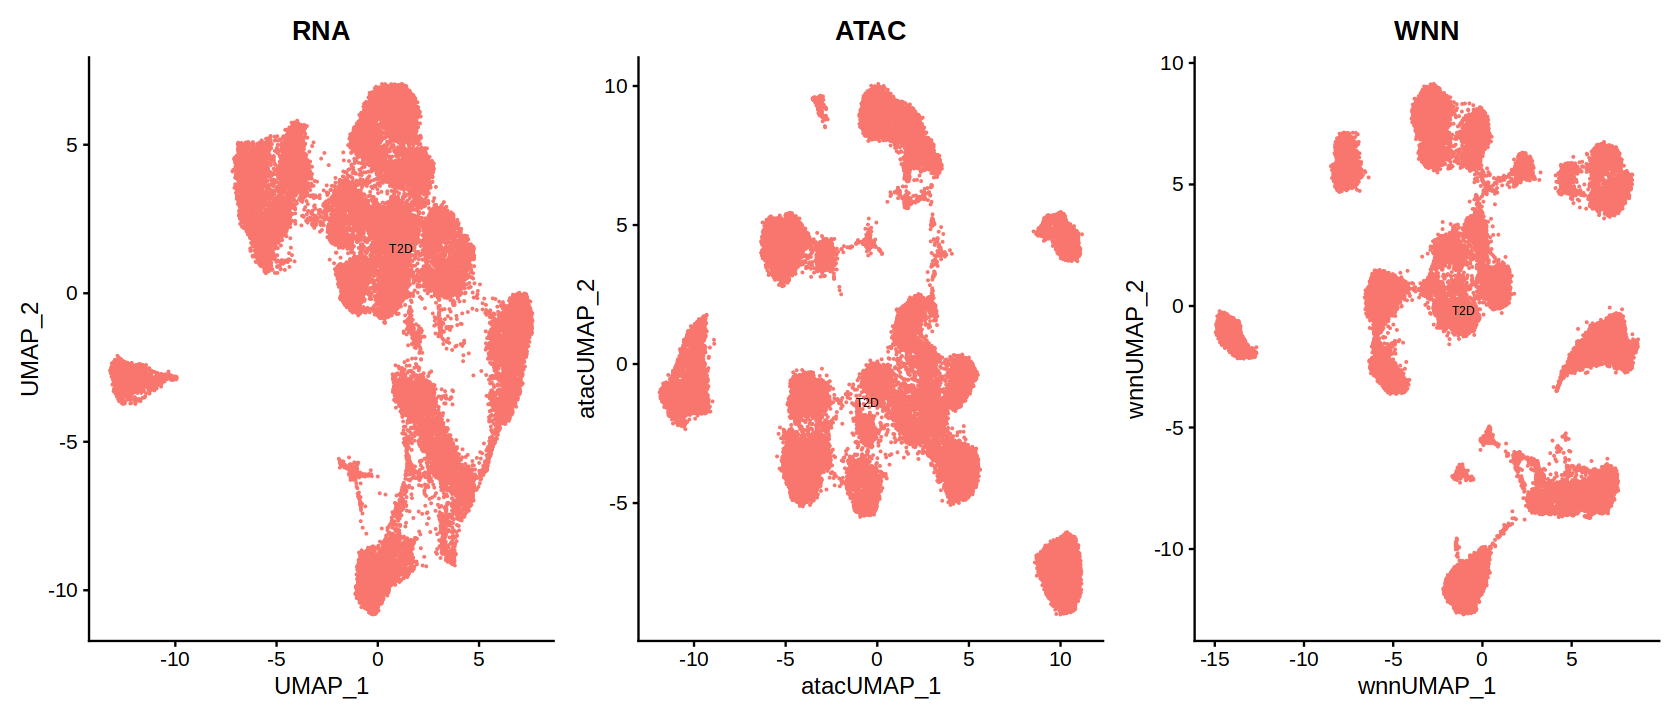

In [51]:
options(repr.plot.width=14, repr.plot.height=6)
p1 <- DimPlot(beta, reduction = "umap.rna", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(beta, reduction = "umap.atac", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(beta, reduction = "wnn.umap", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p1 + p2 + p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

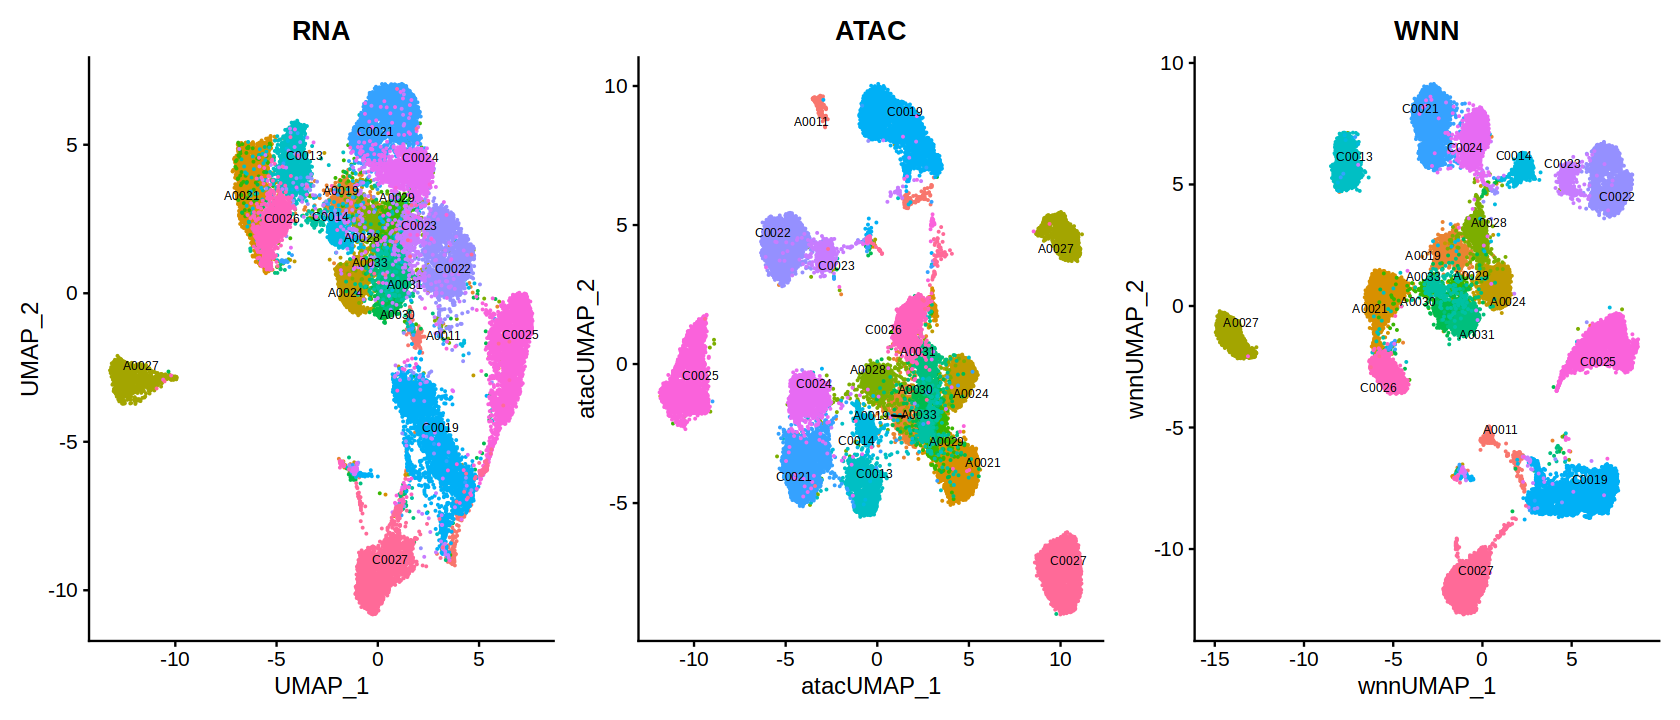

In [53]:
p1 <- DimPlot(beta, reduction = "umap.rna", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(beta, reduction = "umap.atac", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(beta, reduction = "wnn.umap", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p1 + p2 + p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [63]:
beta$status <- as.character(beta$orig.ident)
beta$status[beta$orig.ident %in% c("C0026", "C0027", "A0019", "A0033", "A0027", "C0025")] <- "Non-diabetic"
beta$status[beta$orig.ident %in% c("A0011", "A0028", "A0029", "C0013", "C0014", "A0030", "A0021", "C0022")] <- "Pre-T2D"
beta$status[beta$orig.ident %in% c("C0019", "C0024", "C0021", "A0024", "A0031", "C0023")] <- "T2D"
beta$status <- as.factor(beta$status)

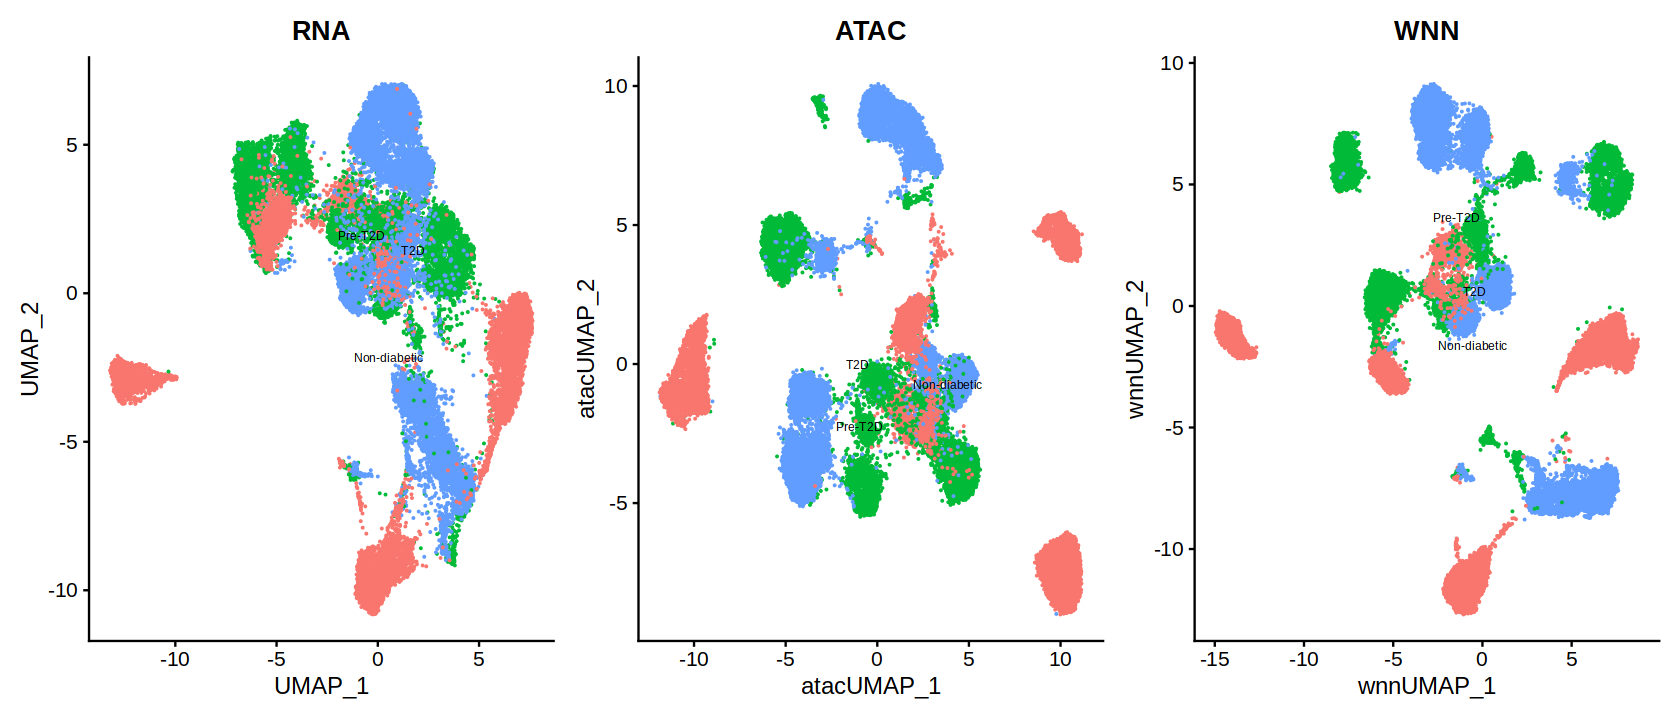

In [65]:
p1 <- DimPlot(beta, reduction = "umap.rna", group.by = "status", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("RNA")
p2 <- DimPlot(beta, reduction = "umap.atac", group.by = "status", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("ATAC")
p3 <- DimPlot(beta, reduction = "wnn.umap", group.by = "status", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p1 + p2 + p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [71]:
# Save the preprocessing result
saveRDS(beta, "../beta.seuratobj.rds")

# DE analysis

In [104]:
DefaultAssay(beta) <- 'RNA'
Idents(beta) <- beta$status
markers <- FindAllMarkers(beta, only.pos = TRUE)
markers <- markers[markers$p_val_adj<0.05,]

Calculating cluster Non-diabetic

Calculating cluster Pre-T2D

Calculating cluster T2D



In [ ]:
# Save DE analysis results
write.table(markers, '../markers_status.txt', quote = F, row.names = F, sep = '\t')

# Aggregate cells (according to donors)

**Note:**

Install the R package DIRECTNET (https://github.com/zhanglhbioinfor/DIRECT-NET) first.

In [2]:
# Load the preprocessing .rds file
beta <- readRDS(file = '../beta.seuratobj.rds')
beta

An object of class Seurat 
444759 features across 27864 samples within 2 assays 
Active assay: ATAC (412097 features, 412097 variable features)
 1 other assay present: RNA
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap

In [5]:
table(beta$orig.ident)


A0011 A0019 A0021 A0024 A0027 A0028 A0029 A0030 A0031 A0033 C0013 C0014 C0019 
  413   896  2081  1237  1060   945   351   623   850   224  1490   704  3250 
C0021 C0022 C0023 C0024 C0025 C0026 C0027 
 2754  2566   626  1484  2736  1164  2410 

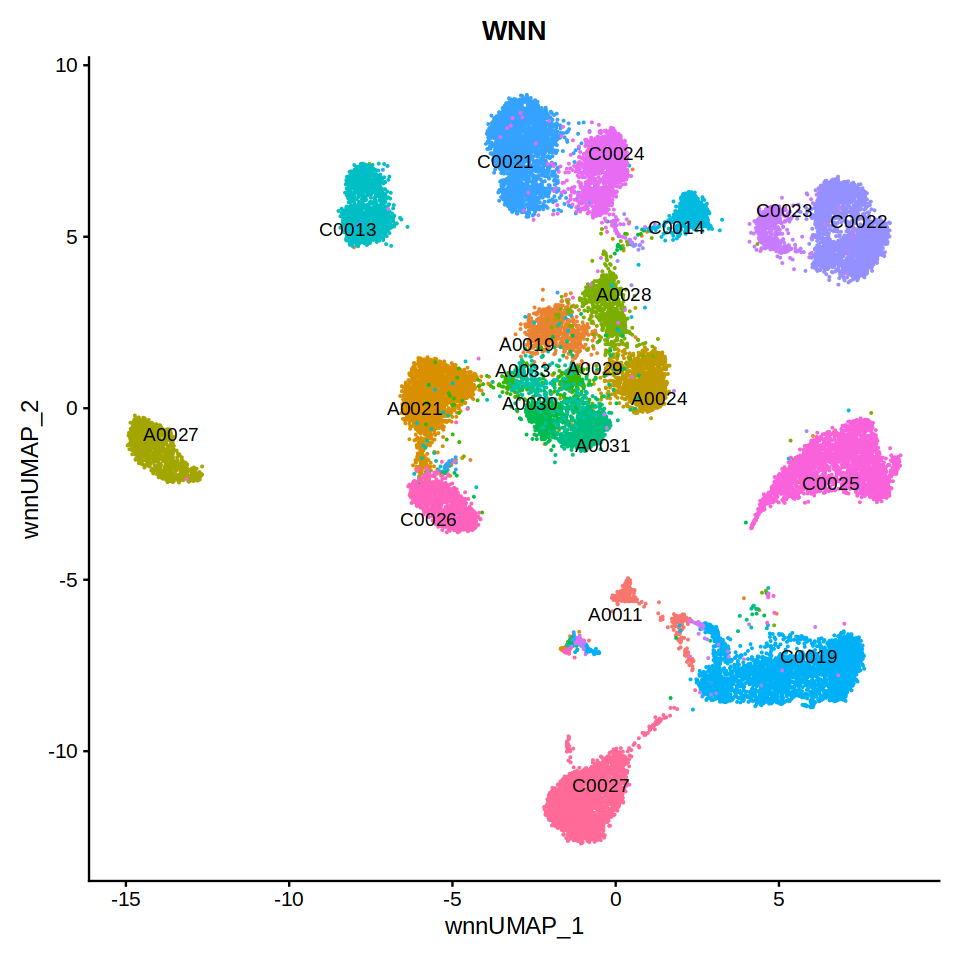

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
p3 <- DimPlot(beta, reduction = "wnn.umap", group.by = "orig.ident", label = TRUE, label.size = 4, repel = TRUE) + ggtitle("WNN")
p3 & NoLegend() & theme(plot.title = element_text(hjust = 0.5))

In [73]:
library(DIRECTNET)

In [74]:
# Define the normalization function
estimateSizeFactorsForDenseMatrix <- function(counts, locfunc = median, round_exprs=TRUE, method="mean-geometric-mean-total"){

  CM <- counts
  if (round_exprs)
    CM <- round(CM)
  if (method == "weighted-median"){
    log_medians <- apply(CM, 1, function(cell_expr) {
      log(locfunc(cell_expr))
    })

    weights <- apply(CM, 1, function(cell_expr) {
      num_pos <- sum(cell_expr > 0)
      num_pos / length(cell_expr)
    })

    sfs <- apply( CM, 2, function(cnts) {
      norm_cnts <-  weights * (log(cnts) -  log_medians)
      norm_cnts <- norm_cnts[is.nan(norm_cnts) == FALSE]
      norm_cnts <- norm_cnts[is.finite(norm_cnts)]
      #print (head(norm_cnts))
      exp( mean(norm_cnts) )
    })
  }else if (method == "median-geometric-mean"){
    log_geo_means <- rowMeans(log(CM))

    sfs <- apply( CM, 2, function(cnts) {
      norm_cnts <- log(cnts) -  log_geo_means
      norm_cnts <- norm_cnts[is.nan(norm_cnts) == FALSE]
      norm_cnts <- norm_cnts[is.finite(norm_cnts)]
      #print (head(norm_cnts))
      exp( locfunc( norm_cnts ))
    })
  }else if(method == "median"){
    row_median <- apply(CM, 1, median)
    sfs <- apply(Matrix::t(Matrix::t(CM) - row_median), 2, median)
  }else if(method == 'mode'){
    sfs <- estimate_t(CM)
  }else if(method == 'geometric-mean-total') {
    cell_total <- apply(CM, 2, sum)
    sfs <- log(cell_total) / mean(log(cell_total))
  }else if(method == 'mean-geometric-mean-total') {
    cell_total <- apply(CM, 2, sum)
    sfs <- cell_total / exp(mean(log(cell_total)))
  }

  sfs[is.na(sfs)] <- 1
  sfs
}

In [88]:
Idents(beta) <- beta$orig.ident
beta.aggregate <- Aggregate_data(beta, k_neigh = 30, max_overlap = 0.6, size_factor_normalize = FALSE)

Aggregating cluster A0011

Sample cells randomly.

Aggregating cluster A0019

Sample cells randomly.

Aggregating cluster A0021

Sample cells randomly.

Aggregating cluster A0024

Sample cells randomly.

Aggregating cluster A0027

Sample cells randomly.

Aggregating cluster A0028

Sample cells randomly.

Aggregating cluster A0029

Sample cells randomly.

Aggregating cluster A0030

Sample cells randomly.

Aggregating cluster A0031

Sample cells randomly.

Aggregating cluster A0033

Sample cells randomly.

Aggregating cluster C0013

Sample cells randomly.

Aggregating cluster C0014

Sample cells randomly.

Aggregating cluster C0019

Sample cells randomly.

Aggregating cluster C0021

Sample cells randomly.

Aggregating cluster C0022

Sample cells randomly.

Aggregating cluster C0023

Sample cells randomly.

Aggregating cluster C0024

Sample cells randomly.

Aggregating cluster C0025

Sample cells randomly.

Aggregating cluster C0026

Sample cells randomly.

Aggregating cluster C0027

Samp

In [91]:
rna_new <- t(t(log(beta.aggregate$rna+1))/estimateSizeFactorsForDenseMatrix(beta.aggregate$rna))
rna_new <- rna_new[rowSums(rna_new!=0)>10, ]
rna_new

WASH7P,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.4887908,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
RP11-34P13.7,0.5153061,0.4947104,0.0000000,0.6109117,0.4992003,0.0000000,0.5585006,0.0000000,0.0000000,0.5495145,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.1669522,0.0000000,0.000000,0.0000000
RP11-34P13.10,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
AL627309.1,0.5153061,0.4947104,0.0000000,0.9682721,0.0000000,0.9078881,0.5585006,0.5032808,0.5362918,0.5495145,⋯,0.0000000,0.0000000,0.7953575,0.0000000,0.0000000,0.0000000,0.7362648,0.7882645,0.505620,0.0000000
RP11-34P13.13,0.5153061,0.7840974,0.6291833,0.6109117,0.0000000,0.0000000,0.0000000,0.5032808,0.5362918,0.5495145,⋯,1.3093808,0.0000000,1.8467630,1.1349370,0.0000000,0.6660956,0.0000000,0.0000000,0.505620,0.0000000
RP11-34P13.9,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
AP006222.2,0.5153061,0.4947104,0.0000000,0.0000000,0.4992003,0.0000000,0.5585006,0.5032808,0.5362918,0.8709598,⋯,1.1278392,0.0000000,1.2606118,1.1349370,0.7503937,1.0557365,1.4725297,1.8302935,1.011240,1.7745749
RP11-206L10.17,1.4466472,0.7840974,0.9972320,0.9682721,1.1591072,1.1456272,1.2967983,1.5098425,1.0725836,0.5495145,⋯,1.5831225,1.3509548,1.5907150,0.9775816,1.9397397,1.8699668,2.3339044,1.2493697,0.505620,1.4063173
RP5-857K21.2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
RP5-857K21.9,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
RP5-857K21.8,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000


In [92]:
atac_new <- t(t(log(beta.aggregate$atac+1))/estimateSizeFactorsForDenseMatrix(beta.aggregate$atac))
atac_new <- atac_new[rowSums(atac_new!=0)>5, ]
atac_new

10-100001665-100002165,0.0000000,0.0000000,0.0000000,0.5656431,0.0000000,0.7415654,0.0000000,0.0000000,0.5202149,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.6300102,0.000000
10-100002531-100003031,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.5723721,0,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
10-100003836-100004336,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.6300102,0.000000
10-100005433-100005933,0.4682107,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.6816064,0.000000,0.0000000,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000
10-100006548-100007048,0.4682107,0.4680396,0.0000000,0.5656431,0.0000000,0.0000000,0.0000000,0.0000000,0.5202149,0.7056186,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
10-100013839-100014339,0.9364215,0.4680396,0.0000000,0.0000000,0.4846233,0.9357514,0.0000000,0.0000000,0.8245212,0.4451958,⋯,0.0000000,1.009967,0.9776367,0.5723721,0,1.0434168,0.0000000,0.9101129,0.0000000,0.000000
10-100018334-100018834,0.0000000,0.0000000,0.0000000,1.1312862,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.5723721,0,0.0000000,0.0000000,0.0000000,0.0000000,1.291983
10-100019564-100020064,0.4682107,0.0000000,0.6274097,0.8965231,0.4846233,0.4678757,0.4758393,0.4610269,0.5202149,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000
10-100020408-100020908,0.4682107,0.4680396,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7056186,⋯,0.6816064,0.000000,0.0000000,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000
10-100021589-100022089,0.4682107,0.0000000,0.0000000,0.0000000,0.4846233,0.0000000,0.0000000,0.0000000,0.0000000,0.4451958,⋯,0.0000000,0.000000,0.9776367,0.0000000,0,0.6583227,0.0000000,0.0000000,0.0000000,0.000000
10-100022276-100022776,0.0000000,0.0000000,0.0000000,0.0000000,0.4846233,0.0000000,0.0000000,0.0000000,0.0000000,0.4451958,⋯,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.9183086,0.0000000,0.0000000,0.000000


In [96]:
# Record samples and labels
sample <- as.data.frame(beta.aggregate$cell_sample)
sample <- cbind(sample, donor = beta$orig.ident[sample$agg_cell], status = beta$status[sample$agg_cell])
sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,agg_cell,donor,status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
A0011_CTATTACTCAAGTGTC-1,286,308,260,326,116,48,277,285,108,49,⋯,368,259,332,74,388,195,312,179,A0011,Pre-T2D
A0011_AAGCGAATCGCTCACT-1,119,295,292,35,247,231,294,392,242,305,⋯,77,185,78,34,194,41,134,14,A0011,Pre-T2D
A0011_GACTCACCAAGCGATG-1,164,163,52,234,123,26,396,159,329,180,⋯,111,334,30,394,167,214,237,197,A0011,Pre-T2D
A0011_TAGTGGCGTTTACGTC-1,20,263,319,251,193,278,250,9,174,92,⋯,173,219,105,256,367,139,170,309,A0011,Pre-T2D
A0011_TACGTTAAGGGATGAC-1,149,226,39,296,145,82,318,335,397,224,⋯,253,254,129,232,330,110,343,303,A0011,Pre-T2D
A0011_GCCTTACTCTTGGATA-1,235,69,126,68,184,211,275,265,188,300,⋯,270,232,161,289,271,254,200,233,A0011,Pre-T2D
A0011_GGAGTCTGTTACGCAA-1,85,369,204,352,379,245,146,324,255,100,⋯,196,400,361,357,385,62,244,249,A0011,Pre-T2D
A0011_TTATGACCACCTGCTC-1,196,362,385,132,357,244,389,400,176,80,⋯,282,33,352,333,146,198,85,383,A0011,Pre-T2D
A0011_GGTTTCCTCATGTTTC-1,6,270,246,254,66,101,232,140,281,397,⋯,303,149,129,169,39,185,220,266,A0011,Pre-T2D


In [100]:
write.csv(sample, '../beta.label.aggregate_30cells.csv')
write.csv(rna_new, '../beta.rna.aggregate_30cells.csv')
write.csv(atac_new, '../beta.atac.aggregate_30cells.csv')